## Preprocessing

In [9]:
 # Data Science Libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# model preprocessing & metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# ooo fancy deep learning
import tensorflow as tf



In [2]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [4]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [33]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()


T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE
application_types_to_replace = ["T9", "T13", "T12", "T2", "T25", "T14", "T29", "T15", "T17"]

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_count = application_df['CLASSIFICATION'].value_counts()
class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_count1 = class_count[class_count > 1]
class_count1

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = [row["index"] for indx, row in application_df.CLASSIFICATION.value_counts().reset_index().iterrows() if row.CLASSIFICATION < 1500] 

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
data = pd.get_dummies(application_df, dtype = float)
data.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
data.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
data.IS_SUCCESSFUL.value_counts()

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [14]:
# Split our preprocessed data into our features and target arrays
x = data.drop(columns=['IS_SUCCESSFUL']).values
y = data['IS_SUCCESSFUL'].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
print(X_train_scaled[0])

[ 0.01394306 -0.02971462 -0.08940766 -0.12375046 -0.17938897  0.51962237
 -0.21887472 -0.1895294  -0.19062721 -0.14808487 -0.14822188 -0.92425606
 -0.04368605  0.93078306 -0.03301006 -0.00881785 -0.02068331 -1.00905985
 -0.40663608  2.17173766 -0.24315396 -0.2445854  -0.26668193 -0.10715222
 -0.06493162 -0.00623504  0.47176845 -0.44687976 -0.65761197 -0.12146379
 -0.03691139  0.68252363 -1.57315209 -0.14917779 -0.12647487  3.02913072
 -0.08299996 -0.16823165 -0.34878853 -0.06432508 -0.07126932  0.02925687
 -0.02925687]


## Compile, Train and Evaluate the Model

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_features = len(X_train_scaled[0])

nodes_layer = 20
nodes_layer2 = 40
nodes_layer3 = 80
nodes_layer4 = 140

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = nodes_layer, input_dim = num_features, activation = 'relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units = nodes_layer2, activation ='relu'))

#Third hidden layer
nn.add(tf.keras.layers.Dense(units = nodes_layer3, activation ='relu'))

#Fourth hidden layer
nn.add(tf.keras.layers.Dense(units = nodes_layer4, activation ='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 20)                880       
                                                                 
 dense_6 (Dense)             (None, 40)                840       
                                                                 
 dense_7 (Dense)             (None, 80)                3280      
                                                                 
 dense_8 (Dense)             (None, 140)               11340     
                                                                 
 dense_9 (Dense)             (None, 1)                 141       
                                                                 
Total params: 16,481
Trainable params: 16,481
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [20]:
# Train the model
train_model = nn.fit(X_train_scaled, y_train, epochs = 200)

Epoch 1/200
804/804 [==============================] - 2s 1ms/step - loss: 0.5744 - accuracy: 0.7166
Epoch 2/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5572 - accuracy: 0.7272
Epoch 3/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5538 - accuracy: 0.7282
Epoch 4/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5511 - accuracy: 0.7284
Epoch 5/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5494 - accuracy: 0.7311
Epoch 6/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5490 - accuracy: 0.7296
Epoch 7/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5476 - accuracy: 0.7336
Epoch 8/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5472 - accuracy: 0.7303
Epoch 9/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5466 - accuracy: 0.7333
Epoch 10/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5459 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.5338 - accuracy: 0.7395
Epoch 82/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5344 - accuracy: 0.7394
Epoch 83/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5339 - accuracy: 0.7397
Epoch 84/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5336 - accuracy: 0.7394
Epoch 85/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5339 - accuracy: 0.7391
Epoch 86/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5333 - accuracy: 0.7393
Epoch 87/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5332 - accuracy: 0.7388
Epoch 88/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5333 - accuracy: 0.7397
Epoch 89/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5332 - accuracy: 0.7394
Epoch 90/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5334 - accuracy: 

804/804 [==============================] - 1s 1ms/step - loss: 0.5322 - accuracy: 0.7400
Epoch 161/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5308 - accuracy: 0.7409
Epoch 162/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5360 - accuracy: 0.7400
Epoch 163/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5315 - accuracy: 0.7397
Epoch 164/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5310 - accuracy: 0.7404
Epoch 165/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5310 - accuracy: 0.7407
Epoch 166/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5308 - accuracy: 0.7405
Epoch 167/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5309 - accuracy: 0.7399
Epoch 168/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5308 - accuracy: 0.7404
Epoch 169/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5317 - a

In [ ]:
#accuracy 74%

In [50]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5717 - accuracy: 0.7339 - 741ms/epoch - 3ms/step
Loss: 0.5717063546180725, Accuracy: 0.7338775396347046


In [22]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity_optimized2.h5')

268/268 [==============================] - 0s 1ms/step

  METRICS FOR THE TESTING SET:
  ----------------------------
  [[2633 1390]
 [ 892 3660]]

                precision    recall  f1-score   support

           0       0.75      0.65      0.70      4023
           1       0.72      0.80      0.76      4552

    accuracy                           0.73      8575
   macro avg       0.74      0.73      0.73      8575
weighted avg       0.74      0.73      0.73      8575

  

AUC for the Model Test Set: 0.7871093912114306


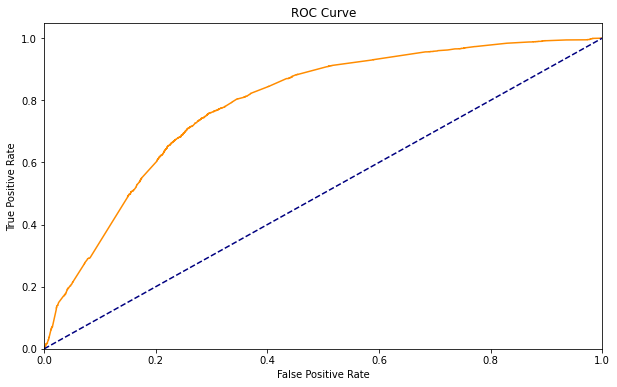

In [53]:
test_proba = [x[0] for x in nn.predict(X_test_scaled)]
test_preds = [round(x) for x in test_proba]

output_test = f"""
  METRICS FOR THE TESTING SET:
  ----------------------------
  {confusion_matrix(y_test, test_preds)}

  {classification_report(y_test, test_preds)}
  """
print(output_test)
print()

#################################################

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, test_proba)

roc_auc_knn = auc(fpr_knn, tpr_knn)
print(f"AUC for the Model Test Set: {roc_auc_knn}")

# make plot
plt.figure(figsize=(10,6))
plt.plot(fpr_knn, tpr_knn, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()